<a href="https://colab.research.google.com/github/shipra-saxena/miniature-potato/blob/master/Assignment_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
df=pd.read_csv('assignment.csv')


In [3]:
df.shape

(10000, 49)

Looking for data information like type of data columns ,missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
UID                         10000 non-null int64
Good_Bad                    10000 non-null object
CUSTOMER_PROFILE_CODE       10000 non-null object
LOCATIONNAME                9872 non-null object
VEHICLEMODEL                9853 non-null object
ASSETCOST                   9855 non-null float64
LOANAMOUNT                  9855 non-null float64
EMI                         9855 non-null float64
TENURE                      9855 non-null float64
ADDRESSCONFIRMED            9855 non-null object
DESIGNATION                 9780 non-null object
RESIDENCETYPE               9758 non-null object
NOOFYEARSINSAMECITY         9758 non-null float64
RESIDENCESTABILITY          9781 non-null float64
RESIDENCELOCALITY           9778 non-null float64
BUSINESSCATEGORY            9777 non-null object
BUSINESSMARGINGROSS         9881 non-null float64
INCOMEEMPLOYMENT            9852 non-null float64

In above information we get to know that there are 10000 rows and 49 columns with multiple missing values.

using plot we try to find out columns with more than 30% missing values and drop them .

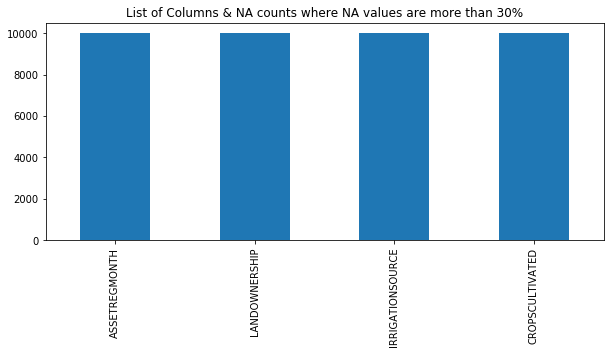

In [5]:
NA_col = df.isnull().sum()
NA_col = NA_col[NA_col.values >(0.3*len(df))]
plt.figure(figsize=(10,4))
NA_col.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 30%')
plt.show()

In [0]:
df=df.drop(['ASSETREGMONTH','LANDOWNERSHIP','IRRIGATIONSOURCE','CROPSCULTIVATED'],axis=1)

In [7]:
df.shape

(10000, 45)

Drop unnecessary columns like uid ,customer profile code 


In [8]:
df=df.drop(['UID','CUSTOMER_PROFILE_CODE'],axis=1)
df.shape

(10000, 43)

Now drop columns with single values since they are of no use

In [0]:
unique = df.nunique()
unique = unique[unique.values == 1]

In [10]:
df.drop(labels = list(unique.index), axis =1, inplace=True)
print("So now we are left with",df.shape ,"rows & columns.")

So now we are left with (10000, 40) rows & columns.


Remove rows with at least 30% missing column values

In [11]:
rownames = df.transpose().isnull().sum()
rownames = list(rownames[rownames.values > 12].index)
df.drop(df.index[rownames],inplace=True) 
print("\nNumber of Rows dropped\t: ",len(rownames))


Number of Rows dropped	:  238


In [0]:
df.info()

In [13]:
df.describe()

,ASSETCOST,LOANAMOUNT,EMI,TENURE,NOOFYEARSINSAMECITY,RESIDENCESTABILITY,RESIDENCELOCALITY,BUSINESSMARGINGROSS,INCOMEEMPLOYMENT,STABILITYINBUSINESS,STABILTIYCONFIRMEDTHRU,MONTHLYTURNOVER,STOCKVALUEINHAND,ENDUSEOFASSET,CURRENTBUSINESSSTABILITY,TOTALEXPENSEPERMONTH,NETINCOMEPERMONTH
count,9.762000e+03,9.762000e+03,9762.000000,9762.000000,9757.000000,9759.000000,9755.000000,9762.000000,9.759000e+03,9762.000000,8162.000000,9.762000e+03,9.762000e+03,9735.000000,9742.000000,9.063000e+03,9.063000e+03
mean,5.295181e+05,3.874482e+05,12256.455542,45.050297,26.651915,78.801173,3.059969,8.210715,1.615463e+05,15.156159,4.371968,2.230655e+05,1.515190e+05,1.059476,18.236827,2.857050e+04,7.181386e+04
std,3.192356e+05,2.393326e+05,6733.548489,12.161130,14.088634,4429.213287,0.496648,21.070324,5.073896e+06,303.644554,1.622153,3.411053e+06,2.795493e+06,0.274707,709.152371,1.236262e+05,2.981577e+05
min,0.000000e+00,5.000000e+04,1402.000000,12.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000e+00,-2.200000e+05
25%,3.000000e+05,2.210000e+05,7759.000000,36.000000,20.000000,8.000000,3.000000,0.000000,4.000000e+04,5.000000,5.000000,0.000000e+00,0.000000e+00,1.000000,5.000000,1.974000e+03,2.900000e+04
50%,4.750000e+05,3.500000e+05,11127.000000,48.000000,25.000000,20.000000,3.000000,0.000000,6.000000e+04,10.000000,5.000000,0.000000e+00,0.000000e+00,1.000000,10.000000,1.200000e+04,4.100000e+04
75%,6.500000e+05,5.000000e+05,14934.750000,60.000000,35.000000,30.000000,3.000000,0.000000,1.000000e+05,15.000000,5.000000,4.000000e+04,0.000000e+00,1.000000,15.000000,2.500000e+04,6.700000e+04
max,7.200000e+06,3.512750e+06,103000.000000,60.000000,401.000000,411014.000000,6.000000,100.000000,5.000000e+08,30000.000000,6.000000,2.100000e+08,2.500000e+08,5.000000,70000.000000,8.267919e+06,1.800000e+07


Now we will try to understand data using statistics and plots

Loans turned in to Good or Bad


In [14]:
df['Good_Bad'].value_counts()

Good    6534
Bad     3228
Name: Good_Bad, dtype: int64

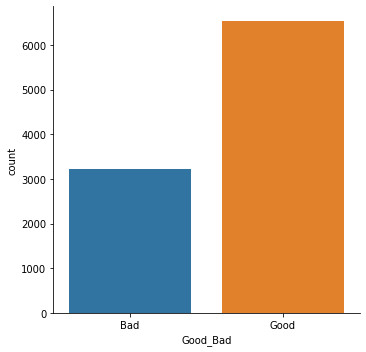

In [15]:
sns.catplot(x='Good_Bad',kind='count',data=df)


**Insight:** we can see around 33% of the loans turned into bad loans out of total.

Location wise distribution of loans


In [0]:
location=df['LOCATIONNAME'].value_counts()[df['LOCATIONNAME'].value_counts()>50]
list_location=list(location.index)

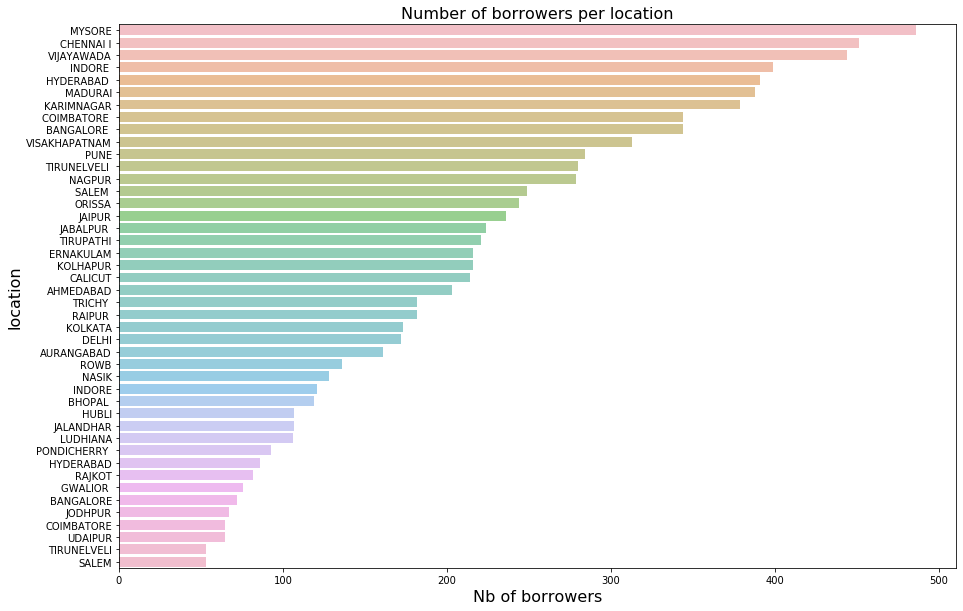

In [17]:
plt.figure(figsize=(15,10))
sns.barplot(y=location.index, x=location.values, alpha=0.6)
plt.title("Number of borrowers per location", fontsize=16)
plt.xlabel("Nb of borrowers", fontsize=16)
plt.ylabel("location", fontsize=16)
plt.show();

Plot to find location of Asset  

In [0]:
location=df['ASSETLOCATION'].value_counts()[df['ASSETLOCATION'].value_counts()>50]
list_location=list(location.index)

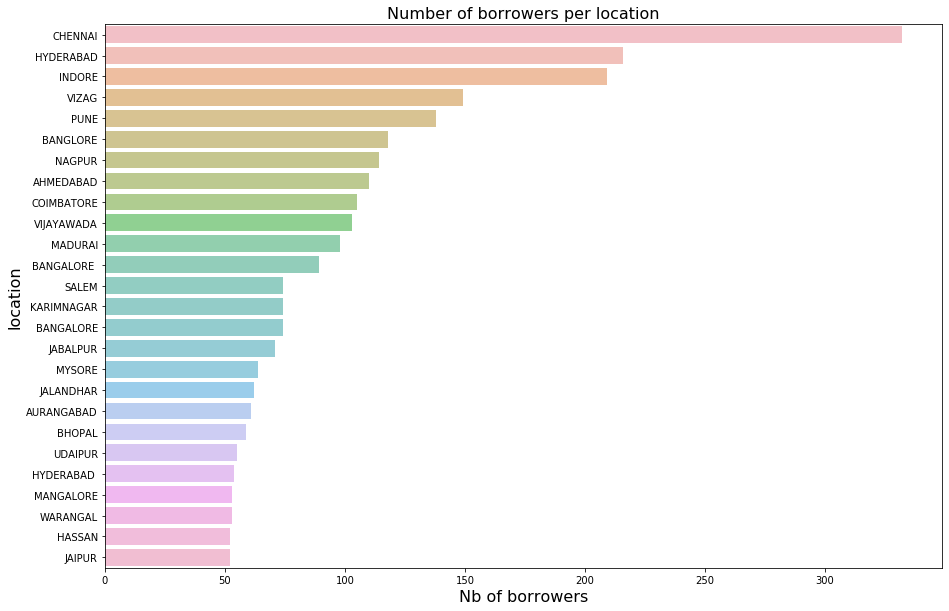

In [19]:
plt.figure(figsize=(15,10))
sns.barplot(y=location.index, x=location.values, alpha=0.6)
plt.title("Number of borrowers per location", fontsize=16)
plt.xlabel("Nb of borrowers", fontsize=16)
plt.ylabel("location", fontsize=16)
plt.show();

Distribution of assetcost

<function matplotlib.pyplot.show>

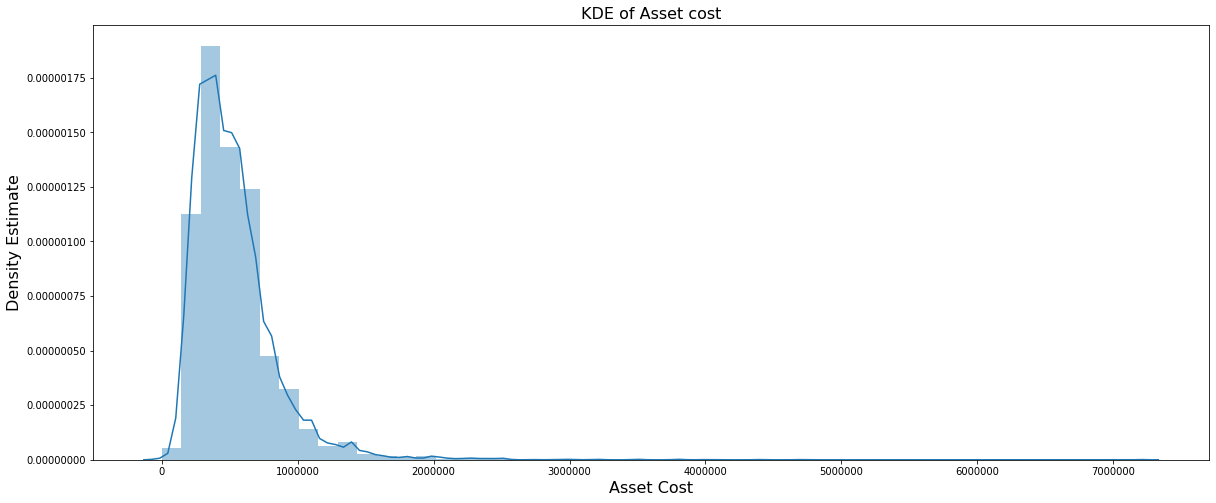

In [20]:
plt.figure(figsize=(20,8))
sns.distplot(df['ASSETCOST'])
plt.ylabel("Density Estimate", fontsize=16)
plt.xlabel('Asset Cost', fontsize=16)
plt.title("KDE of Asset cost", fontsize=16)
plt.show

**Insight:** we can see that mostly the asset cost is distributed between 2 lakh to 10 lakh.The data is also rightly skewed with multiple outliers  

Distribution of Loanamount

<function matplotlib.pyplot.show>

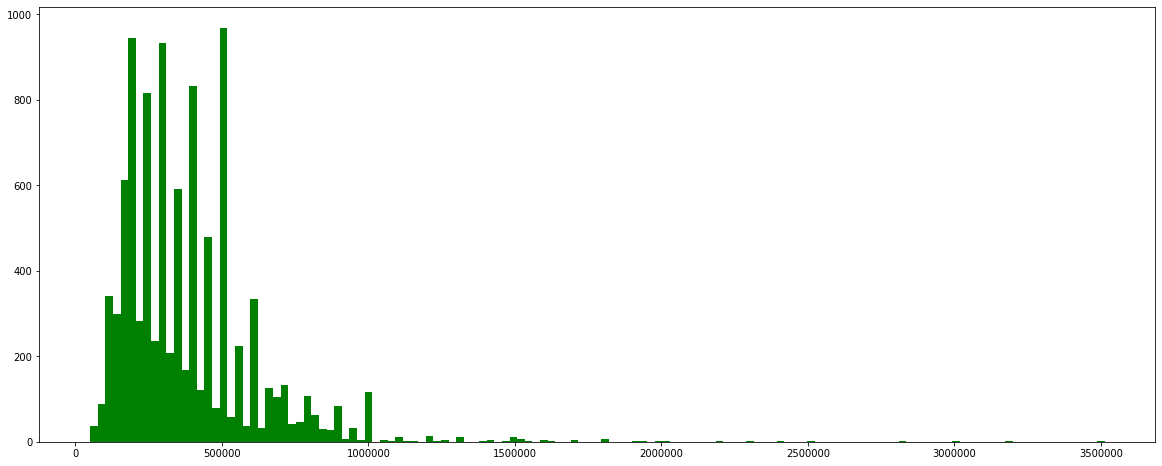

In [22]:
plt.figure(figsize=(20,8))
plt.hist(df['LOANAMOUNT'],bins='auto',color='green')
plt.show

<function matplotlib.pyplot.show>

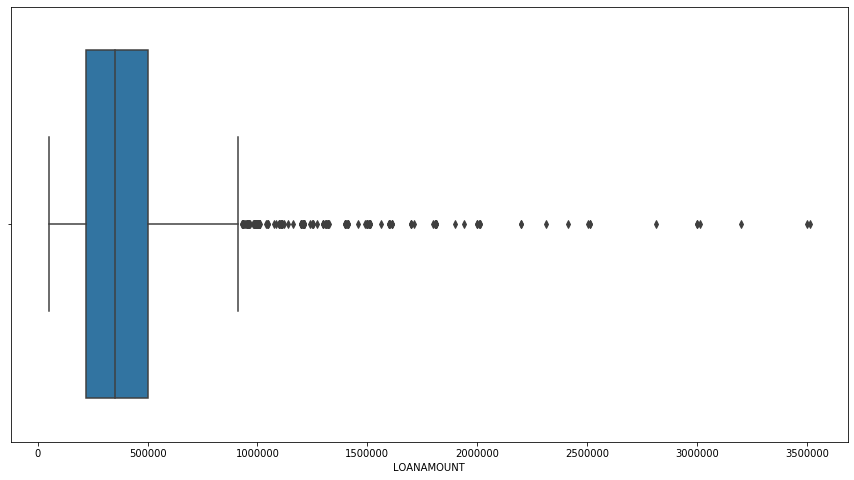

In [23]:
plt.figure(figsize=(15,8))
sns.boxplot(x='LOANAMOUNT',data=df)
plt.show

**Insight:** Minimum senctioned loan is 50000 and maximum is 35 lakhs.75% of sanctioned loan are below 5 lakhs in value.Average loan given is approximately 387000.

<function matplotlib.pyplot.show>

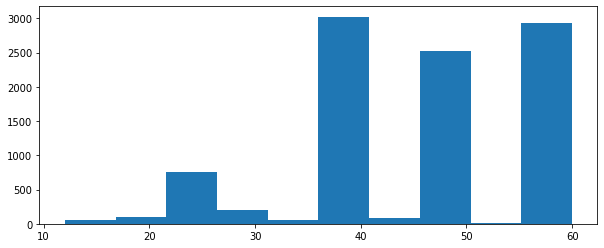

In [24]:
plt.figure(figsize=(10,4))
plt.hist(df['TENURE'],)
plt.show

From the above insight we can clearly see that most of the loans are sanctioned for 3 to 5 years tenure.

<function matplotlib.pyplot.show>

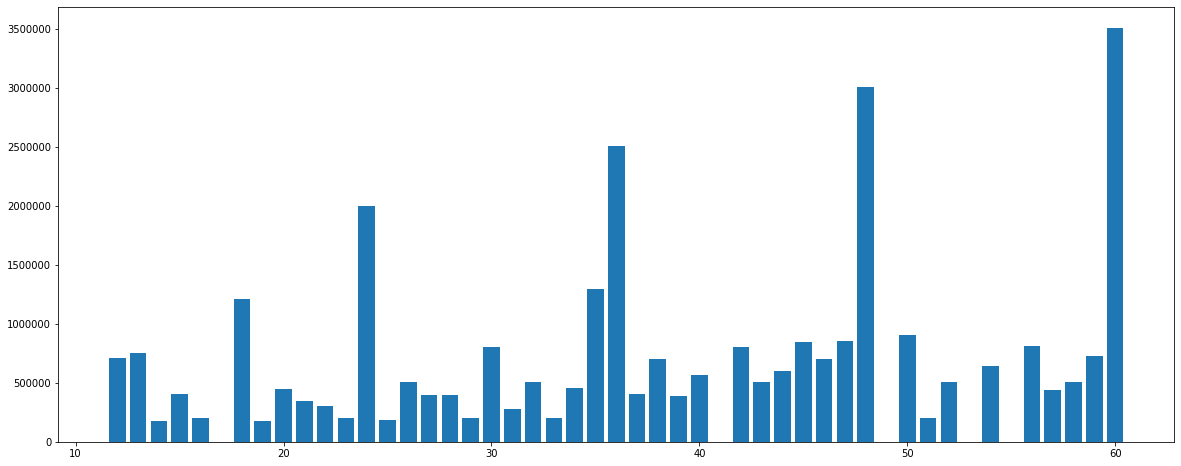

In [25]:
plt.figure(figsize=(20,8))
plt.bar(x="TENURE",height='LOANAMOUNT',data=df)
plt.show

insight for EMI : average EMI IS 12256 AND 75% emi values are below 15000

<function matplotlib.pyplot.show>

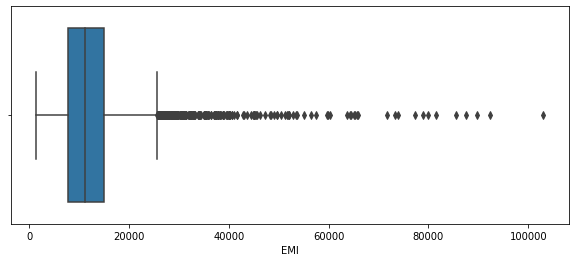

In [26]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df,x='EMI')
plt.show

Boxplot representaion of loan amount with respect to turned into good or bad

<function matplotlib.pyplot.show>

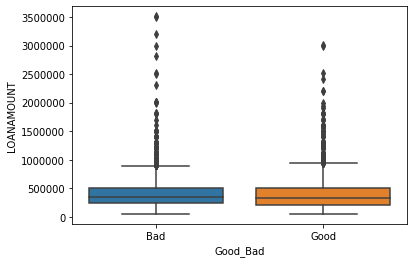

In [27]:
sns.boxplot(x='Good_Bad',y='LOANAMOUNT',data=df)
plt.show

Boxplot representation for Assetcost as per loan turned into Good or Bad

<function matplotlib.pyplot.show>

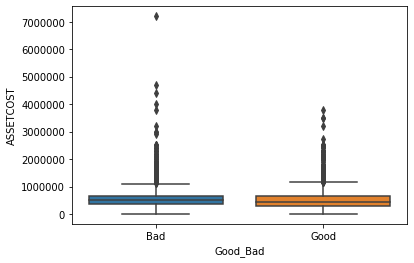

In [28]:
sns.boxplot(x='Good_Bad',y='ASSETCOST',data=df)
plt.show

In [33]:
df['NETINCOMEPERMONTH'].describe()

count       9063.00
mean       71813.86
std       298157.69
min      -220000.00
25%        29000.00
50%        41000.00
75%        67000.00
max     18000000.00
Name: NETINCOMEPERMONTH, dtype: float64

Boxplot representation of person's NetIncome per month and the loan taken by them ultimately turned into good or bad

<function matplotlib.pyplot.show>

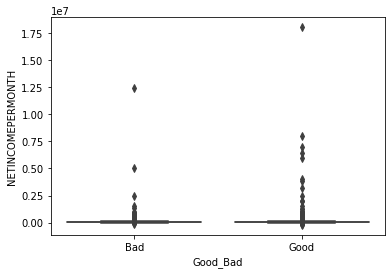

In [34]:
sns.boxplot(x='Good_Bad',y='NETINCOMEPERMONTH',data=df)
plt.show

Now we will try to find out is there any relationship  Good/bad loans and Address confirmation of debtor

Text(0.5, 1, 'Relation between Address confirmation and Loan')

<Figure size 864x432 with 0 Axes>

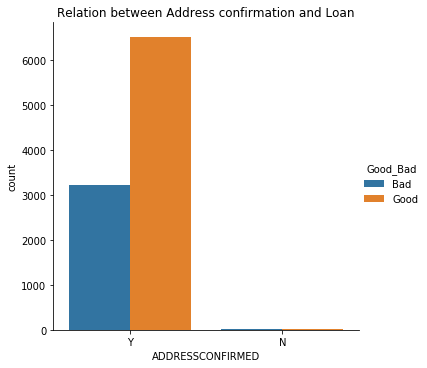

In [35]:
plt.figure(figsize=(12,6))
sns.catplot(x='ADDRESSCONFIRMED',kind='count',hue='Good_Bad',data=df)
plt.title('Relation between Address confirmation and Loan')

**Insight** from above plot we find that most of the addresses are confirmed and there is no significant relation between a loan turned bad and its applicant's address confirmation.so we can say that loans are not given to fradulent persons

Designation of applicant


In [0]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
def create_word_cloud(string):
   maskArray = np.array(Image.open("cloud.png"))
   cloud = WordCloud(background_color = "white", width=3200, 
                      height=2000, mask = maskArray, stopwords = set(STOPWORDS))
   cloud.generate(string)
   plt.axis('off')
   plt.imshow(cloud)
   plt.figure(figsize=(20,8))
   

In [0]:
desg_string=" ".join(df.DESIGNATION.values)

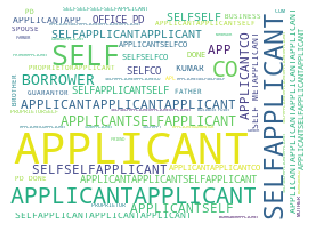

<Figure size 1440x576 with 0 Axes>

In [0]:
create_word_cloud(desg_string)

**Insight** from above word cloud we can see that desgination of most of the customer is APPLICANT or SELF.so mostly loans are used by applicant only.

Relation between type of house and loans senctioned later turned into good/bad

<function matplotlib.pyplot.show>

<Figure size 1440x576 with 0 Axes>

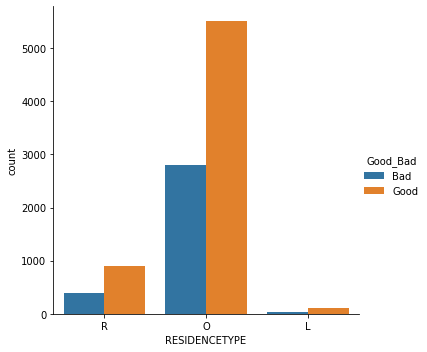

In [40]:
plt.figure(figsize=(20,8))
sns.catplot(x='RESIDENCETYPE',kind='count',hue='Good_Bad',data=df)

plt.show

**Insight** when we see distribution of good and bad loans residence type wise we notice that ratio of good or bad loans in each residence category is approximately same

Good/Bad loans with respect to business category of client

<function matplotlib.pyplot.show>

<Figure size 1440x576 with 0 Axes>

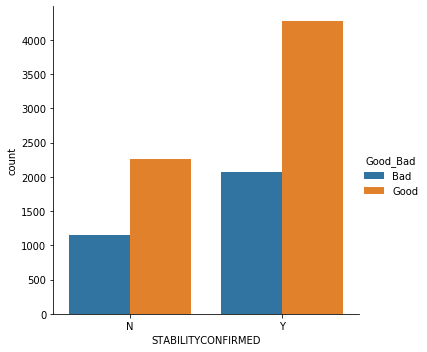

In [41]:
plt.figure(figsize=(20,8))
sns.catplot(x='STABILITYCONFIRMED',kind='count',hue='Good_Bad',data=df)

plt.show

In [42]:
df['STABILITYCONFIRMED'].value_counts()

Y    6345
N    3417
Name: STABILITYCONFIRMED, dtype: int64

We find no significant relationship between confirmed stability in business and loan's status as the ratio in both cases for Good or Bad loans are appx. same.

<function matplotlib.pyplot.show>

<Figure size 1440x576 with 0 Axes>

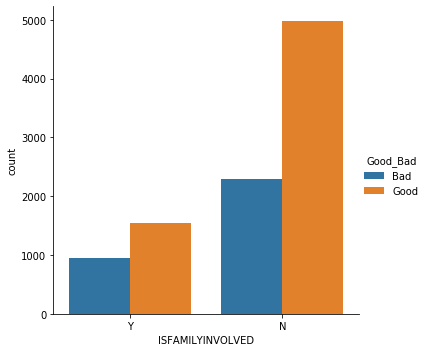

In [43]:
plt.figure(figsize=(20,8))
sns.catplot(x='ISFAMILYINVOLVED',kind='count',hue='Good_Bad',data=df)

plt.show

neighbour reference vs loan turned into good or bad

<function matplotlib.pyplot.show>

<Figure size 1440x576 with 0 Axes>

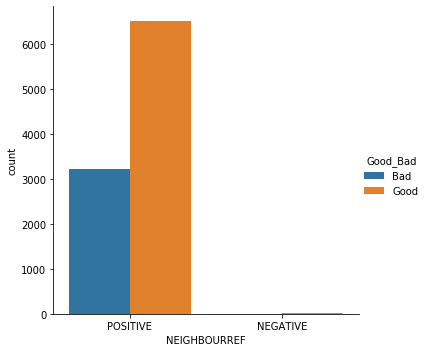

In [44]:
plt.figure(figsize=(20,8))
sns.catplot(x='NEIGHBOURREF',kind='count',hue='Good_Bad',data=df)

plt.show

we find that most of the neaighbour refrences were positive still loan turned into bad

Profession type vs distribution of loan

<function matplotlib.pyplot.show>

<Figure size 1440x576 with 0 Axes>

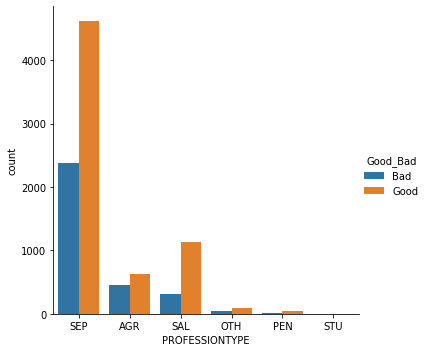

In [103]:
plt.figure(figsize=(20,8))
sns.catplot(x='PROFESSIONTYPE',kind='count',hue='Good_Bad',data=df)

plt.show

In [0]:
pd.options.display.float_format = '{:.2f}'.format

In [0]:
corelation=df.corr()

**Heatmap**

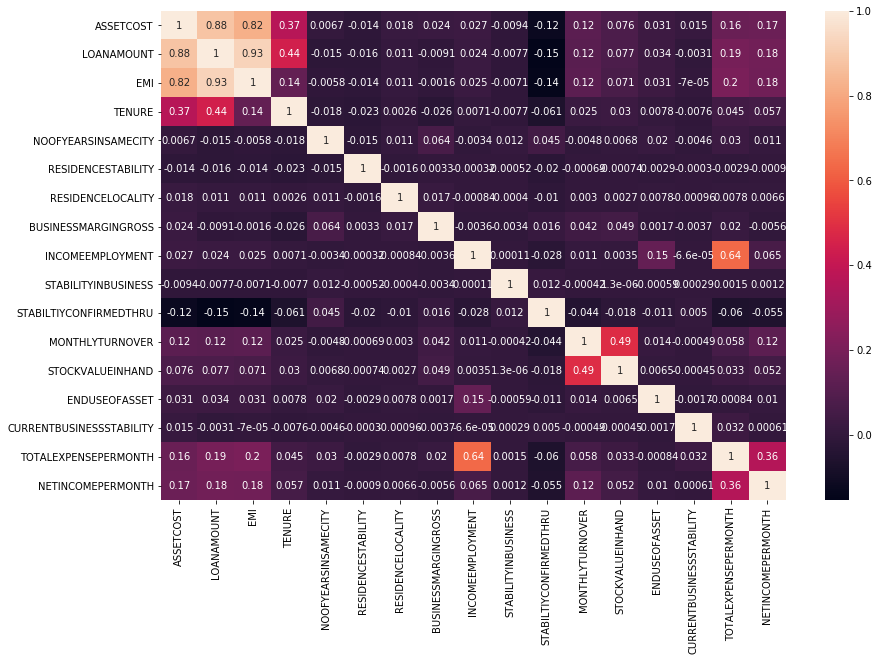

In [134]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(corelation, 
            xticklabels=corelation.columns.values,
            yticklabels=corelation.columns.values,annot= True)
plt.show()

**insight** in corelation matrix we can see that Assetcost and loan amount are highly coreleated.In the same way Income employement is highly corelatd with total expense per month and Net Income per  month

We have to see some other features which are given but after plotting the data we find that they are of not any importance in raching the conclusion.so we can keep them out of our required  fatures.

<function matplotlib.pyplot.show>

<Figure size 1440x576 with 0 Axes>

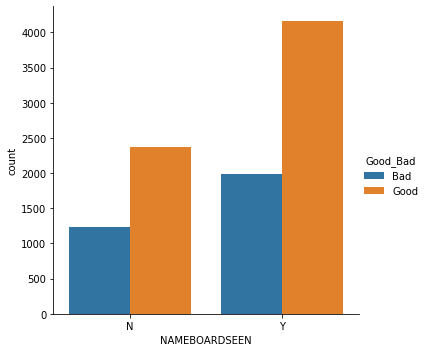

In [45]:
plt.figure(figsize=(20,8))
sns.catplot(x='NAMEBOARDSEEN',kind='count',hue='Good_Bad',data=df)

plt.show

<function matplotlib.pyplot.show>

<Figure size 1440x576 with 0 Axes>

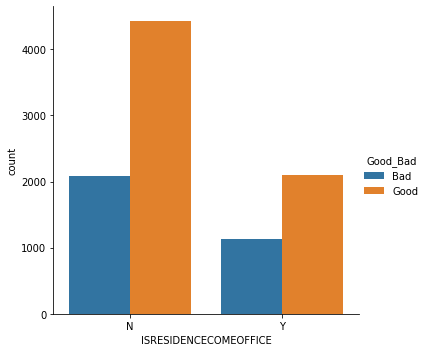

In [46]:
plt.figure(figsize=(20,8))
sns.catplot(x='ISRESIDENCECOMEOFFICE',kind='count',hue='Good_Bad',data=df)

plt.show

<function matplotlib.pyplot.show>

<Figure size 1440x576 with 0 Axes>

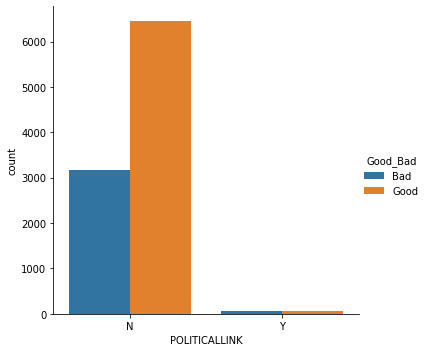

In [47]:
plt.figure(figsize=(20,8))
sns.catplot(x='POLITICALLINK',kind='count',hue='Good_Bad',data=df)

plt.show